In [1]:
import random
import functions

test_size = 80
test_list = random.sample(range(0, 500), test_size)
test_list.sort()

In [2]:
import csv

train_matrix = []
test_matrix = []
train_label = []
test_label = []

with open('dataset/Admission_Predict_data/Admission_Predict_Ver1.1.csv', encoding='utf-8') as f:
    reader = csv.reader(f)
    header = next(reader) # title
    index_test_list = 0
    index_row_list = 0
    for row in reader:
        train_row = []
        for i in range(1, len(row) - 1):
            train_row.append(float(row[i]))
        test_row = float(row[-1])
        
        if index_test_list < test_size and test_list[index_test_list] == index_row_list:
            test_matrix.append(train_row)
            test_label.append(test_row)
            index_test_list += 1
        else:
            train_matrix.append(train_row)
            train_label.append(test_row)
        index_row_list += 1
        

# KNN

In [3]:
import numpy as np
x = np.array(train_matrix)
y = np.array(train_label)
x_test = np.array(test_matrix)

In [4]:
from sklearn.model_selection import KFold

def cross_val(data, label, model):
    kfold = KFold(n_splits = 5, shuffle = False)
    index = kfold.split(X = data, y = label)
    cross_val_error = []
    for train_index, test_index in index:
        model.fit(data[train_index], label[train_index]) # train
        y_pred = model.predict(data[test_index]) # predict
        error = functions.RSS(y_pred, label[test_index]) # error
        cross_val_error.append(error)
    exp_error = sum(cross_val_error)/len(cross_val_error)
    return exp_error

In [5]:
from sklearn.neighbors import KNeighborsRegressor

neighbor = np.linspace(1, 30, 30)
error = []
for i in neighbor:
    neigh = KNeighborsRegressor(n_neighbors = int(i))
    error.append(cross_val(x, y, neigh))

min error: 0.45626746666666645
k when at min error: 15


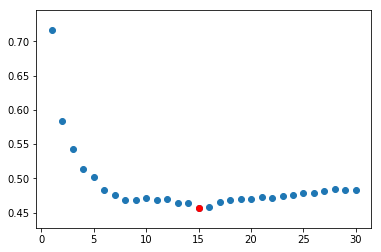

In [7]:
import matplotlib.pyplot as plt
import math
print('min error:', min(error))
print('k when at min error:', error.index(min(error)) + 1)
plt.scatter(neighbor, error)
plt.scatter(15, min(error), c = 'r')
plt.show()